<a href="https://colab.research.google.com/github/sanaghani12/DPS-Code-Task/blob/main/PredictorModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df = pd.read_csv("/content/drive/MyDrive/Data/220511_monatszahlenmonatszahlen2204_verkehrsunfaelle.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
data = df[['MONATSZAHL', 'AUSPRAEGUNG','JAHR','MONAT','WERT']] # important features
data = data.dropna()
data = data[df.JAHR < 2021]
data = data[df.MONAT != 'Summe']
data['MONAT'] = df['MONAT'].str[-2:]

monatszahl_description = {"Alkoholunfälle": "0","Fluchtunfälle": "1","Verkehrsunfälle": "2"}
auspraegung_description = {"insgesamt": "0","mit Personenschäden": "1","Verletzte und Getötete": "2"}
data['MONATSZAHL'] = data['MONATSZAHL'].map(monatszahl_description)
data['AUSPRAEGUNG'] = data['AUSPRAEGUNG'].map(auspraegung_description)

print(data.info())
print(data.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1764 entries, 26 to 2085
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MONATSZAHL   1764 non-null   object 
 1   AUSPRAEGUNG  1764 non-null   object 
 2   JAHR         1764 non-null   int64  
 3   MONAT        1764 non-null   object 
 4   WERT         1764 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 82.7+ KB
None
   MONATSZAHL AUSPRAEGUNG  JAHR MONAT  WERT
26          0           0  2020    01  28.0
27          0           0  2020    02  40.0
28          0           0  2020    03  27.0
29          0           0  2020    04  26.0
30          0           0  2020    05  40.0
31          0           0  2020    06  49.0
32          0           0  2020    07  58.0
33          0           0  2020    08  46.0
34          0           0  2020    09  46.0
35          0           0  2020    10  34.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [47]:

X = data[['MONATSZAHL', 'AUSPRAEGUNG', 'MONAT','JAHR']]
y = data['WERT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1411, 4)
(353, 4)
(1411,)
(353,)


      Actual    Predicted
1388  2643.0  2013.845914
799    797.0  1330.194948
497     39.0  -719.836694
680   1095.0  1344.206858
1462  3529.0  2063.274576
...      ...          ...
1257  3320.0  2038.278698
1151    59.0    45.420885
659    900.0  1386.805682
1906   326.0   746.252277
1265  4017.0  2096.297572

[353 rows x 2 columns]
Mean Absolute Error: 634.0264625148988
Mean Squared Error: 650476.2118485435
Root Mean Squared Error: 806.5210548079594
regressor score:  0.5466887968970344


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


predicted value:  [578]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


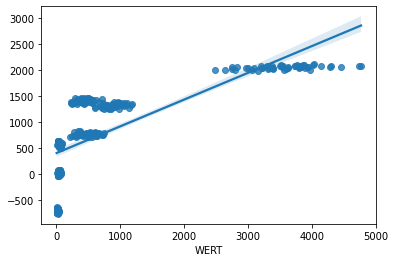

In [48]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
results= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('regressor score: ',regressor.score(X_test,y_test))

sns.regplot(y_test,y_pred) #regression graph plot
new_input = [[0,0,1,2020]]
y_pred = regressor.predict(new_input)
print("predicted value: ",y_pred.astype('int'))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


      Actual    Predicted
1277  3400.0  3604.338763
1382  3271.0  3366.251496
580     37.0    58.393640
1647   200.0   252.075417
357     18.0    29.133083
...      ...          ...
74      32.0    36.057130
940     37.0    18.918387
1457  3586.0  3683.044857
92      23.0    33.537438
1134    83.0   196.231348

[336 rows x 2 columns]
Mean Absolute Error: 74.1282461714142
Mean Squared Error: 22987.95047798519
Root Mean Squared Error: 151.61777757896726
regressor score:  0.9832669606223889
predicted value:  [17]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


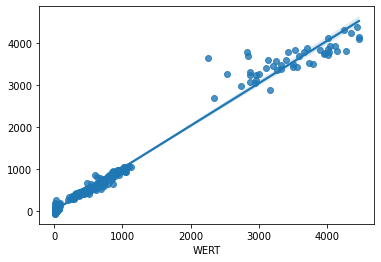

In [49]:
#TRAINING WITH ALL FEATURES (IMPROVED)
data = df[['MONATSZAHL', 'AUSPRAEGUNG','JAHR','MONAT','WERT','VORJAHRESWERT','VERAEND_VORMONAT_PROZENT','VERAEND_VORJAHRESMONAT_PROZENT','ZWOELF_MONATE_MITTELWERT']]
data = data.dropna()
data = data[df.JAHR < 2021]
data = data[df.MONAT != 'Summe']
data['MONAT'] = df['MONAT'].str[-2:]

monatszahl_description = {"Alkoholunfälle": "0","Fluchtunfälle": "1","Verkehrsunfälle": "2"}
auspraegung_description = {"insgesamt": "0","mit Personenschäden": "1","Verletzte und Getötete": "2"}
data['MONATSZAHL'] = data['MONATSZAHL'].map(monatszahl_description)
data['AUSPRAEGUNG'] = data['AUSPRAEGUNG'].map(auspraegung_description)

X = data[['MONATSZAHL', 'AUSPRAEGUNG', 'MONAT','JAHR','VORJAHRESWERT','VERAEND_VORMONAT_PROZENT','VERAEND_VORJAHRESMONAT_PROZENT','ZWOELF_MONATE_MITTELWERT']]
y = data['WERT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
results= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print(results)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('regressor score: ',regressor.score(X_test,y_test))

sns.regplot(y_test,y_pred) #regression graph plot
new_input = [[0,0,1,2020,22,-20,27.27,37]]
y_pred = regressor.predict(new_input)
print("predicted value: ",y_pred.astype('int'))
